In [6]:
import os
import sys
sys.path.append('..')
import PNSN_src.contrib.rflexa.transfer as rft
from obspy import read, read_inventory
import matplotlib.pyplot as plt

In [16]:
src_dir = os.path.join("..", "PNSN_data", "EVID61963316")
st = read(os.path.join(src_dir, "bulk25tp45.mseed"))
inv = read_inventory(os.path.join(src_dir, "station.xml"))
print(st.__str__(extended=True))

48 Trace(s) in Stream:
UW.ABER..HHE  | 2023-10-01T02:55:52.450000Z - 2023-10-01T02:57:02.440000Z | 100.0 Hz, 7000 samples
UW.ABER..HHN  | 2023-10-01T02:55:52.450000Z - 2023-10-01T02:57:02.440000Z | 100.0 Hz, 7000 samples
UW.ABER..HHZ  | 2023-10-01T02:55:52.450000Z - 2023-10-01T02:57:02.440000Z | 100.0 Hz, 7000 samples
UW.ASR2..HHE  | 2023-10-01T02:55:52.240000Z - 2023-10-01T02:57:02.230000Z | 100.0 Hz, 7000 samples
UW.ASR2..HHN  | 2023-10-01T02:55:52.240000Z - 2023-10-01T02:57:02.230000Z | 100.0 Hz, 7000 samples
UW.ASR2..HHZ  | 2023-10-01T02:55:52.240000Z - 2023-10-01T02:57:02.230000Z | 100.0 Hz, 7000 samples
UW.CCFR..HNE  | 2023-10-01T02:55:42.415000Z - 2023-10-01T02:56:52.410000Z | 200.0 Hz, 14000 samples
UW.CCFR..HNN  | 2023-10-01T02:55:42.415000Z - 2023-10-01T02:56:52.410000Z | 200.0 Hz, 14000 samples
UW.CCFR..HNZ  | 2023-10-01T02:55:42.415000Z - 2023-10-01T02:56:52.410000Z | 200.0 Hz, 14000 samples
UW.CDF..HHE   | 2023-10-01T02:55:48.080000Z - 2023-10-01T02:56:58.070000Z | 100.0 H

In [19]:
st_LEVE = st.copy().select(station='LEVE')
# st_LEVE.plot(equal_scale=False)
st_TDH = st.copy().select(station='TDH')
# st_TDH.plot(equal_scale=False)

TypeError: get_evalresp_response() got an unexpected keyword argument 'pre_filter'

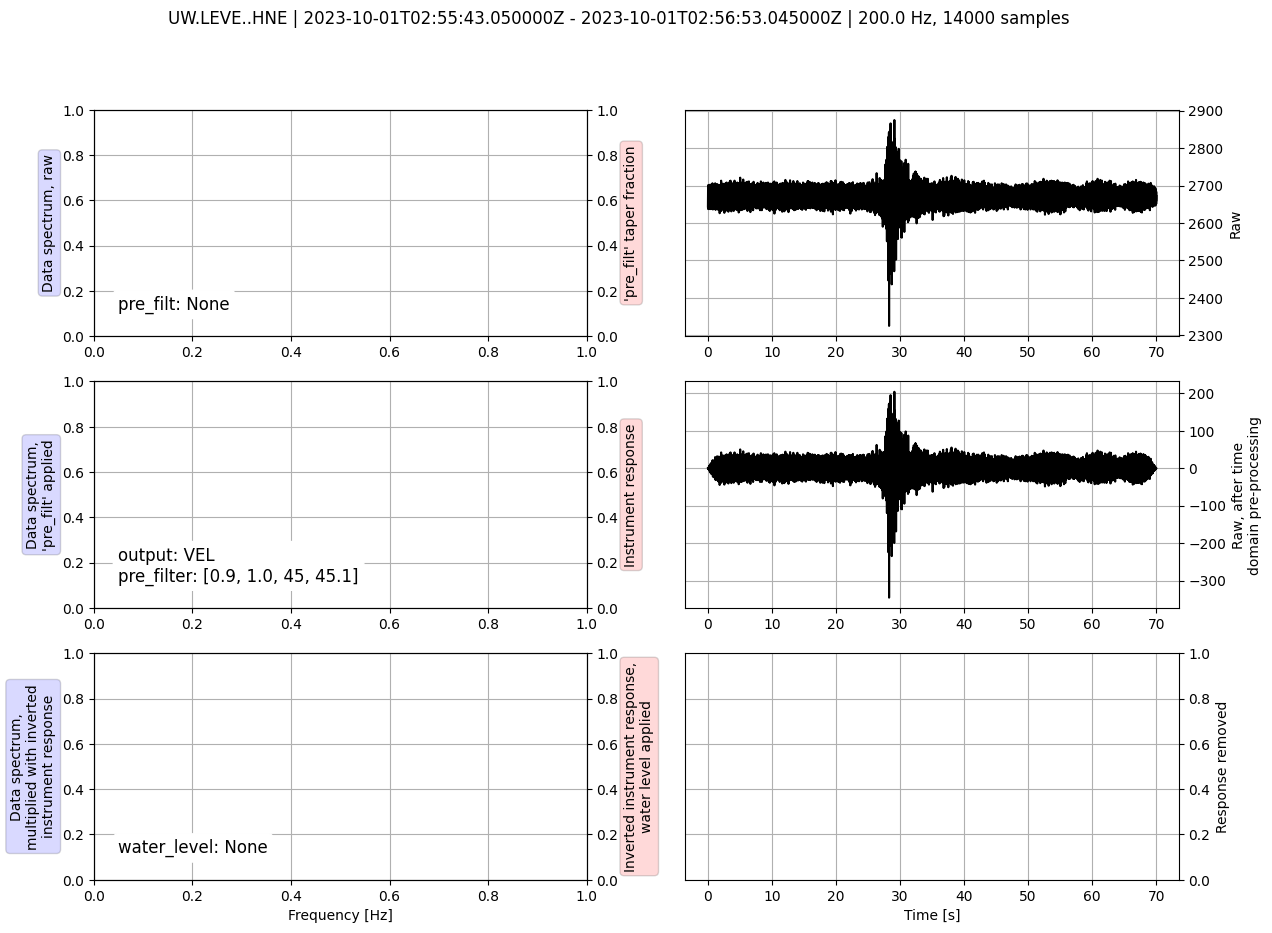

In [22]:
# Try attaching response for deconvolution
st_LEVE.attach_response(inv)
st_TDH.attach_response(inv)


st2_LEVE = st_LEVE.copy().remove_response(water_level=None,pre_filter=[.9, 1., 45, 45.1],plot=True)